In [ ]:
import numpy as np

def rings(N, NA = 0.9, method="Ai"):

    region_area = 4*np.pi/N
    theta_c = np.arccos(1- 2/N)
    delta_ideal = (4*np.pi/N)**0.5
    n_collars_ideal = (np.pi - 2*theta_c)/delta_ideal
    n_collars_fitting = np.int(np.max([1, np.round(n_collars_ideal)]))
    delta_fitting = delta_ideal * n_collars_ideal/n_collars_fitting

    # areas labelled j=1 to n+2 where n is number of collars, collars are j=2 to n+1, caps are j=1 and n+2
    A_j = [2*np.pi*(np.cos(theta_c + (j-2)*delta_fitting) - np.cos(theta_c + (j-1)*delta_fitting)) for j in range(2,(n_collars_fitting+1)+1)]

    area_cap = np.pi*np.sin(theta_c)*np.sin(theta_c)

    total_area = np.sum(A_j)+2*area_cap
    print("A_j and caps (multiples of pi)", total_area/np.pi)


    n_cells_ideal = np.array(A_j)/region_area

    aj = 0
    n_cells_fitting = np.zeros(n_collars_fitting)
    for j in range(n_collars_fitting):
        n_cells_fitting[j] = np.round(n_cells_ideal[j] + aj)
        aj = np.sum(n_cells_ideal[0:j+1] - n_cells_fitting[0:j+1])
    # print("first attempt", n_cells_fitting)

    n_cells_fitting = np.concatenate([[1], n_cells_fitting])
    thetas = \
        [np.arccos(1 - (2/N)*np.sum(n_cells_fitting[0:j+1])) for j in range(0, n_collars_fitting+1)]

    #print(thetas)
    #print(len(thetas))
    #print(theta_c)

    n_cells_fitting = np.asarray(n_cells_fitting, dtype=int)

    areas = []
    for i in range(len(A_j)):
        area = A_j[i]/n_cells_fitting[i+1]
        areas += [area]*n_cells_fitting[i+1]  # i+1 because cap

    from matplotlib import pyplot as plt
    # plt.hist(areas, 50)
    # plt.show()

    #print(areas)
    #plt.plot(np.array(areas))
    #plt.show()

    # print(n_cells_fitting)

    thetas=np.array(thetas)
    # print("scaling-----")
    # print("thetas", thetas)
    needed_max_theta = np.arcsin(NA)
    max_theta_idx = np.min(np.where(thetas > needed_max_theta))
    print(np.min(np.where(thetas > needed_max_theta)))
    theta_scaling = needed_max_theta/thetas[max_theta_idx]
    thetas *= theta_scaling
    thetas = thetas[0:max_theta_idx+1]
    # print(thetas)
    print("NA scaled", np.sin(np.max(thetas)))
    area_cap_scaled = np.pi*np.sin(thetas[0])*np.sin(thetas[0])

    phi_vals_on_ring = [None]*(len(A_j))
    phi_k = np.array([0])
    theta_k = np.array([0])
    area_k = np.array([area_cap_scaled])
    areas_alt_k = np.array([area_cap_scaled])
    areas_usingcaps = np.array([area_cap_scaled])

    areas_manual = []
    last_idx = None
    last_ring = None

    for i in range(len(thetas)-1):
        dtheta = (thetas[i+1] - thetas[i])
        theta = (thetas[i+1] + thetas[i])/2
        circumference = 2*np.pi*np.sin(theta)
        ring_area_man = circumference*dtheta
        area_manual = ring_area_man/n_cells_fitting[i+1]
        area_cap_method = 2*np.pi*(np.cos(thetas[i])-np.cos(thetas[i+1]))/n_cells_fitting[i+1]

        area = A_j[i]/n_cells_fitting[i+1]

        phi_vals = np.linspace(0, 2*np.pi, n_cells_fitting[i+1], endpoint=False)

        last_phi = phi_vals  # keep track of last phi so we can place the next point in-between

        phi_k = np.append(phi_k, phi_vals)
        theta_k = np.append(theta_k, [thetas[i]]*n_cells_fitting[i+1])
        area_k = np.append(area_k, [area]*n_cells_fitting[i+1])
        areas_alt_k = np.append(areas_alt_k, [area_manual]*n_cells_fitting[i+1])
        areas_usingcaps = np.append(areas_usingcaps, [area_cap_method]*n_cells_fitting[i+1])
        # print("i", i)
        # if np.sin(thetas[i+1]) > NA and last_idx is None:
        if i+1 == max_theta_idx:
            actual_NA = np.sin(thetas[i+1])
            last_idx = len(area_k)
            last_ring = i

    ### compare areas ###
    costheta = (1-NA**2)**0.5
    expected_area =  2*np.pi*(1-costheta)
    costheta2 = (1-actual_NA**2)**0.5
    expected_area2 =  2*np.pi*(1-costheta2)
    area_sum = np.sum(area_k[0:last_idx])
    area_alt_sum = np.sum(areas_alt_k[0:last_idx])
    areas_sum_usingcaps = np.sum(areas_usingcaps[0:last_idx])

    last_cap = np.pi*np.sin(np.pi-thetas[-1])**2

    print("---------------------")

    return (theta_k, phi_k, area_k)

    if method == 'Ai':
        return (area_sum - expected_area2)/expected_area2
    elif method == 'caps':
        return (areas_sum_usingcaps - expected_area2)/expected_area2
    elif method == 'manual':
        return (area_alt_sum - expected_area2)/expected_area2

<ipython-input-1-91480abb9380>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_collars_fitting = np.int(np.max([1, np.round(n_collars_ideal)]))
<ipython-input-19-e7dee1340e82>:29: RuntimeWarning: divide by zero encountered in true_divide
  atan = np.arctan(phi_y/phi_x)


A_j and caps (multiples of pi) 3.999998
14
NA scaled 0.9
---------------------


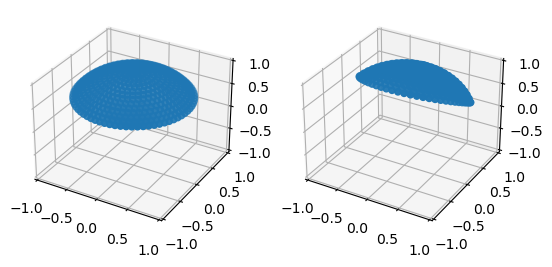

In [19]:
import numpy as np
from matplotlib import pyplot as plt

N = 2000
(theta_k, phi_k, area_k) = rings(N)

y = np.sin(theta_k)*np.sin(phi_k)
x = np.sin(theta_k)*np.cos(phi_k)
z = np.cos(theta_k)

f3d = plt.figure()
ax = f3d.add_subplot(121, projection='3d')
ax.scatter(x,y,z)
ax.set_xlim3d([-1,1])
ax.set_ylim3d([-1,1])
ax.set_zlim3d([-1,1])
# ax.set_aspect('equal', 'box')
# plt.show()

# split into phi x and phi y
phi_x = theta_k*np.cos(phi_k)
phi_y = theta_k*np.sin(phi_k)

# rotate about x, so in phi_y
phi_y += 35*np.pi/180

# convert back
theta_k = np.sqrt(phi_y*phi_y + phi_x*phi_x)
atan = np.arctan(phi_y/phi_x)  

atan_p_pi = np.logical_and(phi_x < 0, phi_y >= 0) 
atan_m_pi = np.logical_and(phi_x < 0, phi_y < 0)
pi_2 = np.logical_and(phi_x == 0, phi_y > 0)
m_pi_2 = np.logical_and(phi_x == 0, phi_y < 0) 

phi_k = np.zeros_like(phi_k)
phi_k[phi_x != 0] = np.arctan(phi_y[phi_x != 0]/phi_x[phi_x != 0])
phi_k[pi_2] = np.pi/2
phi_k[m_pi_2] = -np.pi/2

phi_k[atan_p_pi] = phi_k[atan_p_pi] + np.pi
phi_k[atan_m_pi] = phi_k[atan_m_pi] - np.pi

# back to xyz for plotting
y = np.sin(theta_k)*np.sin(phi_k)
x = np.sin(theta_k)*np.cos(phi_k)
z = np.cos(theta_k)

ax2 = f3d.add_subplot(122, projection='3d')
ax2.scatter(x,y,z)
ax2.set_xlim3d([-1,1])
ax2.set_ylim3d([-1,1])
ax2.set_zlim3d([-1,1])
plt.show()


In [ ]:

   
from matplotlib import pyplot as plt

area_diff = []
area_diff_capmethod = []
area_diff_manual = []
N_list =  [100, 200, 500, 1000]#, 2000, 5000, 10000, 100000]
N_list = np.linspace(50, 5000, 20)
# N_list = np.linspace(5000, 100000, 10)
print(N_list)

for N in N_list:
    resid = rings(N)
    area_diff.append(resid)

for N in N_list:
    resid = rings(N, method="caps")
    area_diff_capmethod.append(resid)

for N in N_list:
    resid = rings(N, method="manual")
    area_diff_manual.append(resid)

plt.plot(N_list, area_diff, linestyle='-',label='Ai')


plt.plot(N_list, area_diff_capmethod,linestyle='--',label='cap')


plt.plot(N_list, area_diff_manual,linestyle='--',label='manual')
plt.legend()
plt.show()

f3d = plt.figure(1)
x = np.sin(theta_k)*np.cos(phi_k)

